In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

timestamp = "20240820_174021"
ra2c_csv = pd.read_csv(f"test_log_RA2C_{timestamp}.csv")
recurrent_csv = pd.read_csv(f"test_log_recurrent_{timestamp}.csv")
vanilla_csv = pd.read_csv(f"test_log_vanilla_{timestamp}.csv")
fixed_csv = pd.read_csv(f"test_log_fixedprob_{timestamp}.csv")

ra2c_lastrewards = ra2c_csv[ra2c_csv["epoch"]==299]["reward"]
recurrent_lastrewards = recurrent_csv[recurrent_csv["epoch"]==299]["reward"]
vanilla_lastrewards = vanilla_csv[vanilla_csv["epoch"]==299]["reward"]
fixed_lastrewards = fixed_csv[fixed_csv["epoch"]==299]["reward"]

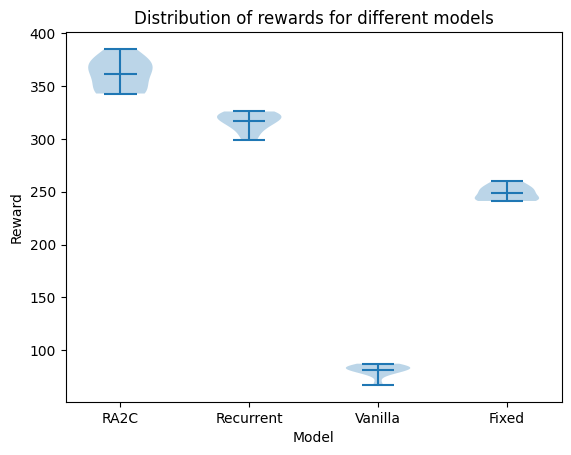

In [4]:
fig, ax = plt.subplots()
violin = ax.violinplot([ra2c_lastrewards, recurrent_lastrewards, vanilla_lastrewards, fixed_lastrewards], showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Distribution of rewards for different models")
plt.xticks([1, 2, 3, 4], ["RA2C", "Recurrent", "Vanilla", "Fixed"])
plt.show()

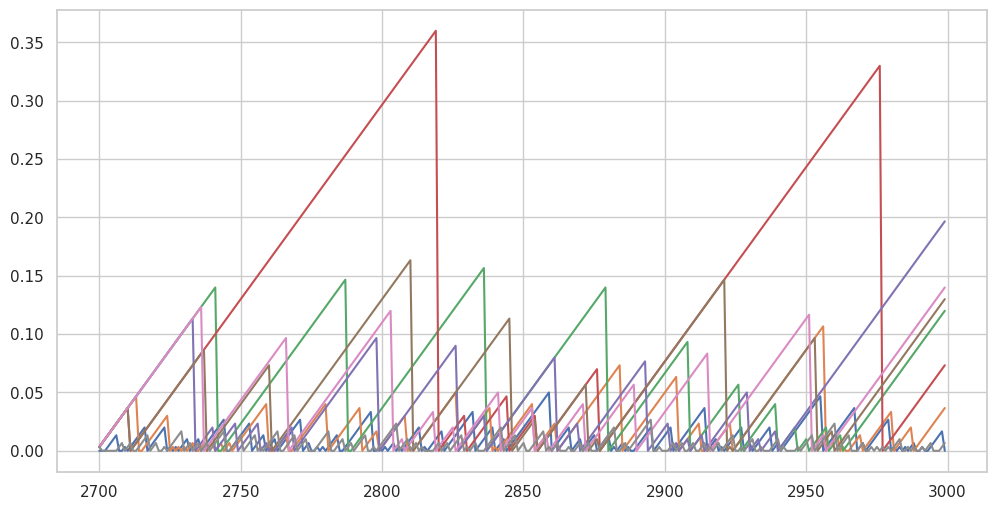

In [52]:
plt.figure(figsize=(12, 6))
# Draw a line plot for the last episode with the data grouped by the 'name' column
for i in range(8):
    plt.plot(ra2c_csv[ra2c_csv.episode == ra2c_csv.episode.max()]["aoi_"+str(i)], label='aoi_'+str(i))

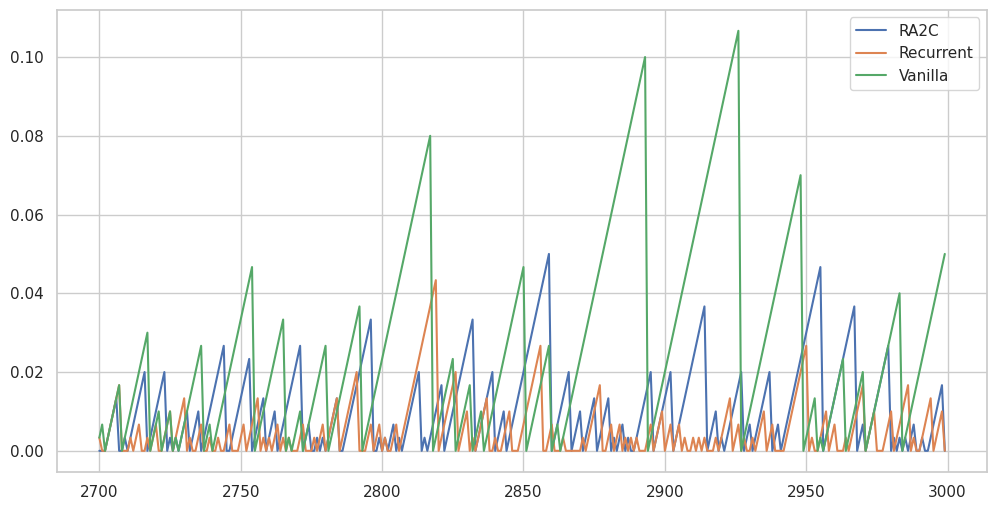

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(ra2c_csv[ra2c_csv.episode == ra2c_csv.episode.max()]["aoi_0"], label='aoi_0')
plt.plot(recurrent_csv[recurrent_csv.episode == recurrent_csv.episode.max()]["aoi_0"], label='aoi_0')
plt.plot(vanilla_csv[vanilla_csv.episode == vanilla_csv.episode.max()]["aoi_0"], label='aoi_0')
plt.legend(['RA2C', 'Recurrent', 'Vanilla'])

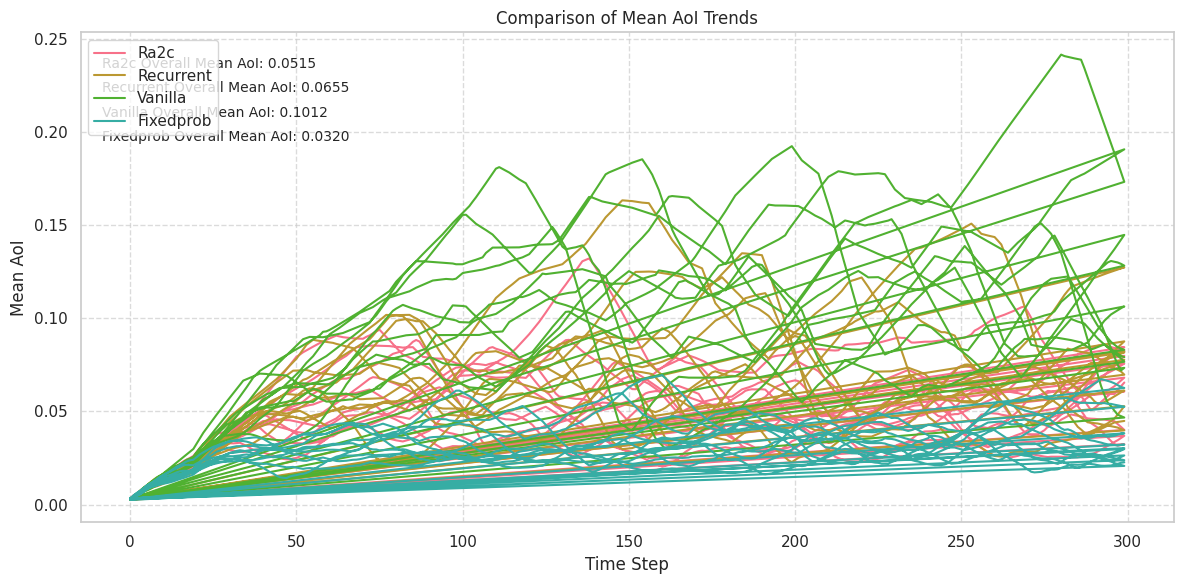

In [7]:
import seaborn as sns

# Set the style for the plot
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Function to load and process data
def load_data(filename):
    df = pd.read_csv(filename)
    aoi_columns = [col for col in df.columns if col.startswith('aoi_')]
    df['mean_aoi'] = df[aoi_columns].mean(axis=1)
    df['smoothed_mean_aoi'] = df.groupby('episode')['mean_aoi'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
    return df

# Load data for each mode
timestamp = "20240820_121815"  # Replace with your actual timestamp
modes = ["RA2C", "recurrent", "vanilla", "fixedprob"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)

# Create the plot
plt.figure(figsize=(12, 6))

for mode in modes:
    df = dataframes[mode]
    plt.plot(df['epoch'], df['smoothed_mean_aoi'], label=mode.capitalize())

plt.xlabel('Time Step')
plt.ylabel('Mean AoI')
plt.title('Comparison of Mean AoI Trends')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add overall mean AoI for each mode
for i, mode in enumerate(modes):
    mean_aoi = dataframes[mode]['mean_aoi'].mean()
    plt.text(0.02, 0.95 - i*0.05, f'{mode.capitalize()} Overall Mean AoI: {mean_aoi:.4f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()

# Save the figure
# plt.savefig(f'aoi_trend_comparison_{timestamp}.png', dpi=300, bbox_inches='tight')
# plt.close()

# print(f"Figure saved as aoi_trend_comparison_{timestamp}.png")

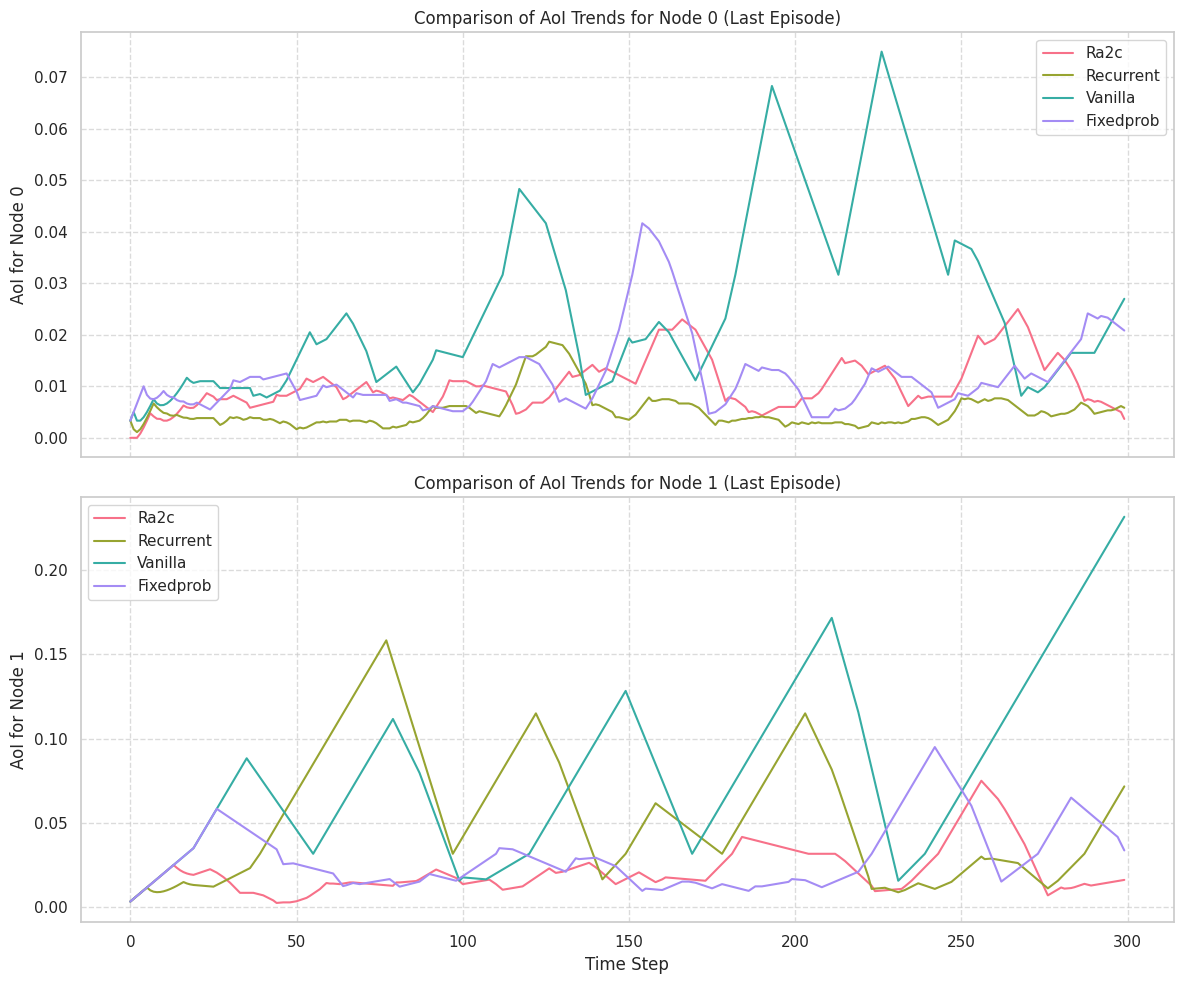

In [10]:
# Set the style for the plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 4)  # 4 colors for 4 modes

# Function to load and process data
def load_data(filename):
    df = pd.read_csv(filename)
    last_episode = df['episode'].max()
    df_last = df[df['episode'] == last_episode].copy()
    df_last['smoothed_aoi_0'] = df_last['aoi_0'].rolling(window=20, min_periods=1).mean()
    df_last['smoothed_aoi_1'] = df_last['aoi_1'].rolling(window=20, min_periods=1).mean()
    return df_last

# Load data for each mode
timestamp = "20240820_121815"
modes = ["RA2C", "recurrent", "vanilla", "fixedprob"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

for i, mode in enumerate(modes):
    df = dataframes[mode]
    ax1.plot(df['epoch'], df['smoothed_aoi_0'], label=mode.capitalize(), color=colors[i])
    ax2.plot(df['epoch'], df['smoothed_aoi_1'], label=mode.capitalize(), color=colors[i])

# Customize the first subplot (aoi_0)
ax1.set_ylabel('AoI for Node 0')
ax1.set_title('Comparison of AoI Trends for Node 0 (Last Episode)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Customize the second subplot (aoi_1)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('AoI for Node 1')
ax2.set_title('Comparison of AoI Trends for Node 1 (Last Episode)')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# # Add overall mean AoI for each mode and node
# for i, mode in enumerate(modes):
#     mean_aoi_0 = dataframes[mode]['aoi_0'].mean()
#     mean_aoi_1 = dataframes[mode]['aoi_1'].mean()
#     ax1.text(0.02, 0.95 - i*0.05, f'{mode.capitalize()} Mean AoI: {mean_aoi_0:.4f}', 
#              transform=ax1.transAxes, fontsize=9, verticalalignment='top')
#     ax2.text(0.02, 0.95 - i*0.05, f'{mode.capitalize()} Mean AoI: {mean_aoi_1:.4f}', 
#              transform=ax2.transAxes, fontsize=9, verticalalignment='top')

plt.tight_layout()

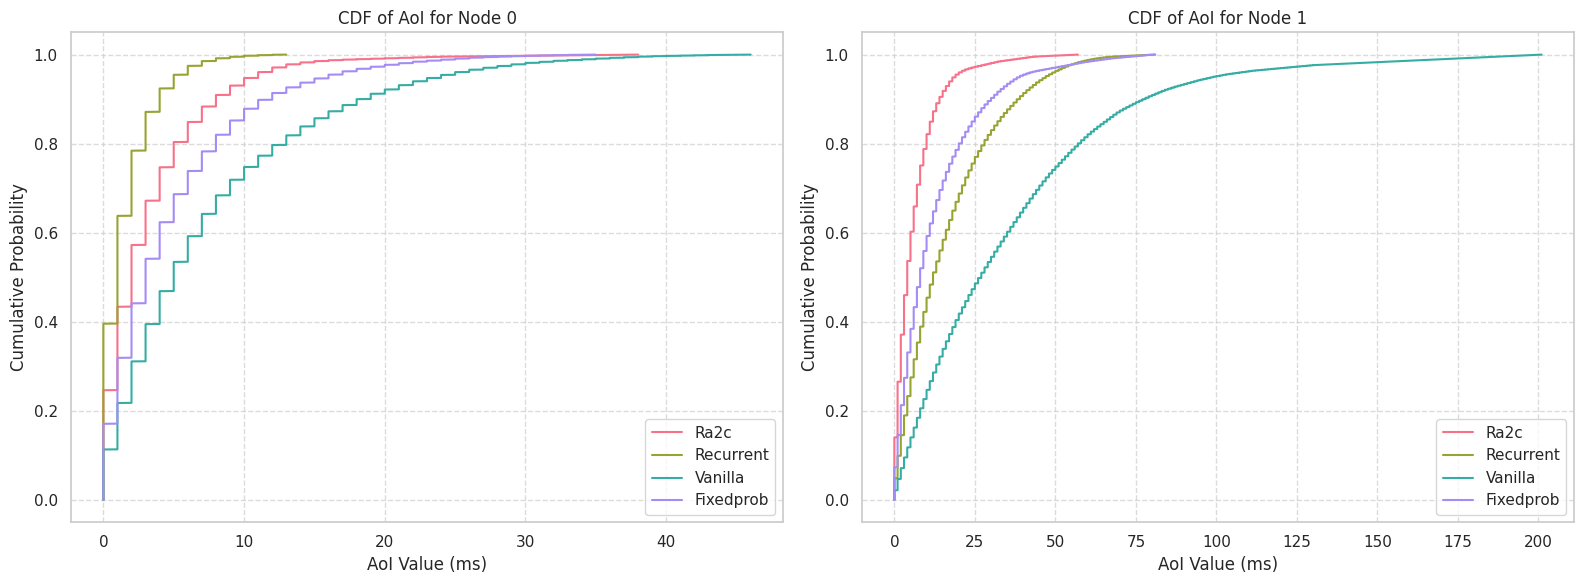

In [9]:
# Set the style for the plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 4)  # 4 colors for 4 modes

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Load data for each mode
timestamp = "20240820_121815"
modes = ["RA2C", "recurrent", "vanilla", "fixedprob"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)

# Create CDF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, mode in enumerate(modes):
    df = dataframes[mode]
    
    # CDF for aoi_0
    x0, y0 = compute_cdf(df['aoi_0'])
    ax1.plot(x0*300, y0, label=mode.capitalize(), color=colors[i])
    
    # CDF for aoi_1
    x1, y1 = compute_cdf(df['aoi_1'])
    ax2.plot(x1*300, y1, label=mode.capitalize(), color=colors[i])

# Customize the first subplot (aoi_0)
ax1.set_xlabel('AoI Value (ms)')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('CDF of AoI for Node 0')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Customize the second subplot (aoi_1)
ax2.set_xlabel('AoI Value (ms)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('CDF of AoI for Node 1')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

In [60]:
# Set the style for the plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 4)  # 4 colors for 4 modes

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load data for each mode
timestamp = "20240820_121815"
modes = ["RA2C", "recurrent", "vanilla", "fixedprob"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)


In [68]:
action_columns = ['action_0', 'action_1', 'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'action_7']
dataframes["RA2C"][action_columns].to_numpy().sum()

10363

In [70]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = ['action_0', 'action_1', 'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'action_7']

for i, mode in enumerate(modes):
    df = dataframes[mode]
    print(f"Mode: {mode}")
    print(f"Avg. number of tx actions of all agents: {df[action_columns].to_numpy().sum()/10}")

Mode: RA2C
Avg. number of tx actions of all agents: 1036.3
Mode: recurrent
Avg. number of tx actions of all agents: 1171.3
Mode: vanilla
Avg. number of tx actions of all agents: 1166.8
Mode: fixedprob
Avg. number of tx actions of all agents: 1028.0
